In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

ABS_path = "Data/ABS_Labourstatus_Data.csv"
ABS_metadata = pd.read_csv(ABS_path, low_memory = False)
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value,Flag Codes,Flags
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,236.0,NaN,NaN
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,113.0,NaN,NaN
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,348.0,NaN,NaN
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,105.0,NaN,NaN
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,58.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay (C),2016.0,2016.0,32.0,NaN,NaN
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale (S),2016.0,2016.0,45.0,NaN,NaN
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori (S),2016.0,2016.0,0.0,NaN,NaN
158548,T75,75 - 84,1,Males,LF,Total Labour Force,1,New South Wales,LGA2016,Local Government Areas (2016),12930,Georges River (A),2016.0,2016.0,167.0,NaN,NaN


In [2]:
#Remove Flag Code and Flags Colums
ABS_metadata = ABS_metadata.drop(['Flag Codes', 'Flags'], axis=1)
#Remove NaN rows
ABS_metadata = ABS_metadata.dropna()
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,236.0
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,113.0
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury (C),2016.0,2016.0,348.0
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,105.0
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional (A),2016.0,2016.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158544,T55,55 - 64,1,Males,LF,Total Labour Force,5,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning (S),2016.0,2016.0,22.0
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay (C),2016.0,2016.0,32.0
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale (S),2016.0,2016.0,45.0
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori (S),2016.0,2016.0,0.0


In [3]:
new = ABS_metadata['Region'].str.split('(', n = 1, expand = True)
ABS_metadata['Region'] = new[0]
ABS_metadata

,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,STATE,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury,2016.0,2016.0,236.0
1,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury,2016.0,2016.0,113.0
2,A15,15 - 19,3,Persons,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10050,Albury,2016.0,2016.0,348.0
3,A15,15 - 19,1,Males,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional,2016.0,2016.0,105.0
4,A15,15 - 19,2,Females,1,"Employed, worked full-time",1,New South Wales,LGA2016,Local Government Areas (2016),10130,Armidale Regional,2016.0,2016.0,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158544,T55,55 - 64,1,Males,LF,Total Labour Force,5,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning,2016.0,2016.0,22.0
158545,T55,55 - 64,1,Males,4,"Employed, hours of work not stated",1,New South Wales,LGA2016,Local Government Areas (2016),11100,Botany Bay,2016.0,2016.0,32.0
158546,T45,45 - 54,2,Females,TOT,Total,3,Queensland,LGA2016,Local Government Areas (2016),33830,Hope Vale,2016.0,2016.0,45.0
158547,T25,25 - 34,2,Females,4,"Employed, hours of work not stated",5,Western Australia,LGA2016,Local Government Areas (2016),57000,Perenjori,2016.0,2016.0,0.0


In [4]:
#State just WA
ABS_WA_data = ABS_metadata.set_index('STATE')

In [5]:
ABS_WA_data = ABS_WA_data.drop([1,2,3,4,6,7,8,9], inplace=False)

In [6]:
ABS_WA_data = ABS_WA_data.reset_index()

In [7]:
ABS_WA_data

,STATE,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,204.0
1,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,101.0
2,5,A15,15 - 19,3,Persons,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,302.0
3,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale,2016.0,2016.0,280.0
4,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale,2016.0,2016.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39207,5,T65,65 - 74,1,Males,4,"Employed, hours of work not stated",Western Australia,LGA2016,Local Government Areas (2016),53640,Gnowangerup,2016.0,2016.0,0.0
39208,5,T75,75 - 84,2,Females,UEMP,Total Unemployed,Western Australia,LGA2016,Local Government Areas (2016),52310,Cuballing,2016.0,2016.0,0.0
39209,5,T65,65 - 74,2,Females,6,"Unemployed, looking for part-time work",Western Australia,LGA2016,Local Government Areas (2016),57080,Perth,2016.0,2016.0,5.0
39210,5,T55,55 - 64,1,Males,LF,Total Labour Force,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning,2016.0,2016.0,22.0


In [8]:
LFS_WA_Data_totals = ABS_WA_data.groupby("Labour force status").sum()
LFS_WA_Data_totals

,STATE,SEX_ABS,TIME,Census year,Value
Labour force status,,,,,
"Employed, away from work",16400,6559,6612480.0,6612480.0,156565.0
"Employed, hours of work not stated",16430,6567,6624576.0,6624576.0,68463.0
"Employed, worked full-time",16320,6530,6580224.0,6580224.0,2412684.0
"Employed, worked part-time",16235,6489,6545952.0,6545952.0,1328181.0
Labour force status not stated,16315,6529,6578208.0,6578208.0,507855.0
Not in the labour force,16250,6513,6552000.0,6552000.0,2045654.0
Total,16335,6530,6586272.0,6586272.0,6927326.0
Total Employed,16270,6530,6560064.0,6560064.0,4019955.0
Total Labour Force,16380,6550,6604416.0,6604416.0,4398171.0


In [9]:
LFS_WA_Data_totals = LFS_WA_Data_totals.drop(['STATE', 'SEX_ABS','TIME',"Census year"], axis=1)

In [10]:
LFS_WA_Data_totals = LFS_WA_Data_totals.drop(['Total', 'Total Labour Force', 'Not in the labour force','Labour force status not stated','Employed, away from work','Employed, hours of work not stated','Employed, worked full-time','Employed, worked part-time','Unemployed, looking for full-time work','Unemployed, looking for full-time work','Unemployed, looking for part-time work'], inplace=False)

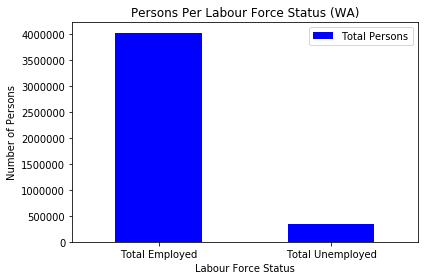

In [12]:
LFS_WA_Data_totals = LFS_WA_Data_totals.rename(columns = {"Value":"Total Persons"})
LFS_WA_Data_count_plot  = LFS_WA_Data_totals.plot(kind="bar",facecolor="blue")
plt.title("Persons Per Labour Force Status (WA)")
#plt.ylim(0,30)
plt.xlabel("Labour Force Status")
plt.ylabel("Number of Persons")
plt.xticks(rotation=0)
plt.tight_layout()
plt.legend(loc="upper right")
LFS_WA_Data_count_plot;

In [13]:
ABS_WA_data

,STATE,AGE,Age,SEX_ABS,Sex,LFSP_C16,Labour force status,State,REGIONTYPE,Geography Level,LGA_2016,Region,TIME,Census year,Value
0,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,204.0
1,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,101.0
2,5,A15,15 - 19,3,Persons,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50080,Albany,2016.0,2016.0,302.0
3,5,A15,15 - 19,1,Males,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale,2016.0,2016.0,280.0
4,5,A15,15 - 19,2,Females,1,"Employed, worked full-time",Western Australia,LGA2016,Local Government Areas (2016),50210,Armadale,2016.0,2016.0,142.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39207,5,T65,65 - 74,1,Males,4,"Employed, hours of work not stated",Western Australia,LGA2016,Local Government Areas (2016),53640,Gnowangerup,2016.0,2016.0,0.0
39208,5,T75,75 - 84,2,Females,UEMP,Total Unemployed,Western Australia,LGA2016,Local Government Areas (2016),52310,Cuballing,2016.0,2016.0,0.0
39209,5,T65,65 - 74,2,Females,6,"Unemployed, looking for part-time work",Western Australia,LGA2016,Local Government Areas (2016),57080,Perth,2016.0,2016.0,5.0
39210,5,T55,55 - 64,1,Males,LF,Total Labour Force,Western Australia,LGA2016,Local Government Areas (2016),58400,Trayning,2016.0,2016.0,22.0


In [14]:
#Persons by Area
LFS_WA_Data_Areatotals = ABS_WA_data.loc[(ABS_WA_data["Labour force status"] == "Total Employed") | (ABS_WA_data["Labour force status"] == "Total Unemployed"),:]
LFS_WA_Data_Areatotals = LFS_WA_Data_Areatotals.groupby("Region").sum()
LFS_WA_Data_Areatotals = LFS_WA_Data_Areatotals.drop(['STATE', 'SEX_ABS','TIME',"Census year"], axis=1)
LFS_WA_Data_Areatotals = LFS_WA_Data_Areatotals.rename(columns = {"Value":"Total Persons"})
LFS_WA_Data_Areatotals


,Total Persons
Region,
Albany,61534.0
Armadale,146354.0
Ashburton,29343.0
Augusta-Margaret River,24757.0
Bassendean,24595.0
...,...
Wyalkatchem,709.0
Wyndham-East Kimberley,12341.0
Yalgoo,597.0


In [18]:
LFS_WA_Data_Employed = ABS_WA_data.loc[ABS_WA_data["Labour force status"] == "Total Employed",:]

In [19]:
LFS_WA_Data_Employed = LFS_WA_Data_Employed.groupby("Region").sum()
LFS_WA_Data_Employed = LFS_WA_Data_Employed.drop(['STATE', 'SEX_ABS','TIME',"Census year"], axis=1)
LFS_WA_Data_Employed = LFS_WA_Data_Employed.rename(columns = {"Value":"Total Employed"})
LFS_WA_Data_Employed

,Total Employed
Region,
Albany,58384.0
Armadale,133351.0
Ashburton,28729.0
Augusta-Margaret River,23587.0
Bassendean,22410.0
...,...
Wyalkatchem,630.0
Wyndham-East Kimberley,11477.0
Yalgoo,591.0


In [48]:
merged_data_Employed = pd.merge(LFS_WA_Data_Employed, LFS_WA_Data_Areatotals, how="outer", on="Region")
merged_data_Employed

,Total Employed,Total Persons
Region,,
Albany,58384.0,61534.0
Armadale,133351.0,146354.0
Ashburton,28729.0,29343.0
Augusta-Margaret River,23587.0,24757.0
Bassendean,22410.0,24595.0
...,...,...
Wyalkatchem,630.0,709.0
Wyndham-East Kimberley,11477.0,12341.0
Yalgoo,591.0,597.0


In [49]:
merged_data_Employed["Unemployed"] = merged_data_Employed["Total Persons"] - merged_data_Employed["Total Employed"]
merged_data_Employed["Unemployment Rate (%)"] = merged_data_Employed["Unemployed"] / merged_data_Employed["Total Employed"] *100
#merged_data_Employed = merged_data_Employed.set_index('Region')
#merged_data_Employed = merged_data_Employed.drop(['No usual address'], axis=0)
#merged_data_Employed = merged_data_Employed.set_index('Region')
merged_data_Employed.sort_values(by=['Unemployment Rate (%)'], inplace=True,ascending=False)
merged_data_Employed = merged_data_Employed.reset_index()
merged_data_Employed = merged_data_Employed.drop([1], axis=0)

,Region,Total Employed,Total Persons,Unemployed,Unemployment Rate (%)
0,Ngaanyatjarraku,957.0,1326.0,369.0,38.557994
2,Halls Creek,2380.0,2957.0,577.0,24.243697
3,Derby-West Kimberley,6997.0,8480.0,1483.0,21.194798
4,Upper Gascoyne,253.0,299.0,46.0,18.181818
5,Mandurah,94449.0,109164.0,14715.0,15.579837
...,...,...,...,...,...
134,Williams,1923.0,1953.0,30.0,1.560062
135,Yalgoo,591.0,597.0,6.0,1.015228
136,Kent,989.0,995.0,6.0,0.606673
137,Lake Grace,2473.0,2486.0,13.0,0.525677


In [58]:
merged_data_Employed
merged_data_Employed = merged_data_Employed.set_index('Region')

KeyError: "None of ['Region'] are in the columns"

In [61]:
merged_data_Employed_top10 = merged_data_Employed.drop(['Total Employed','Total Persons','Unemployed'], axis=1)
merged_data_Employed_top10 = merged_data_Employed_top10.head(10)

In [62]:
merged_data_Employed_top10

,Unemployment Rate (%)
Region,
Ngaanyatjarraku,38.557994
Halls Creek,24.243697
Derby-West Kimberley,21.194798
Upper Gascoyne,18.181818
Mandurah,15.579837
Collie,13.757486
Wyalkatchem,12.539683
Mount Magnet,12.475248
Canning,12.392842


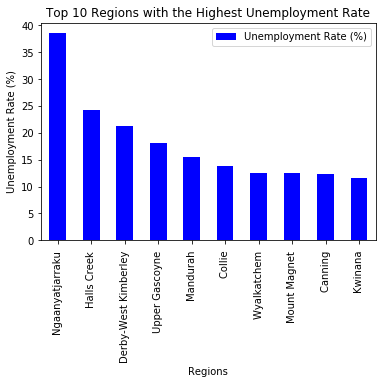

In [68]:
merged_data_Employed_top10_plot  = merged_data_Employed_top10.plot(kind="bar",facecolor="blue")
plt.title("Top 10 Regions with the Highest Unemployment Rate")
#plt.ylim(0,30)
plt.xlabel("Regions")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.legend(loc="upper right")
merged_data_Employed_top10_plot;

In [74]:
merged_data_Employed_bottom10 = merged_data_Employed.drop(['Total Employed','Total Persons','Unemployed'], axis=1)
merged_data_Employed_bottom10 = merged_data_Employed_bottom10.tail(10)
merged_data_Employed_bottom10.sort_values(by=['Unemployment Rate (%)'], inplace=True)


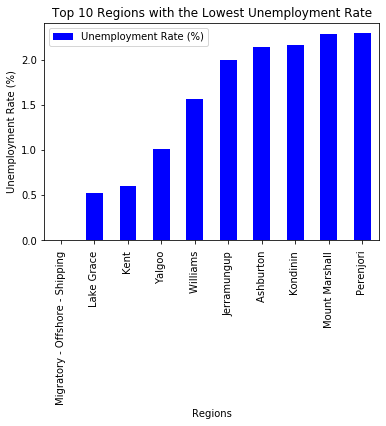

In [75]:
merged_data_Employed_bottom10_plot  = merged_data_Employed_bottom10.plot(kind="bar",facecolor="blue")
plt.title("Top 10 Regions with the Lowest Unemployment Rate")
#plt.ylim(0,30)
plt.xlabel("Regions")
plt.ylabel("Unemployment Rate (%)")
plt.xticks(rotation=90)
#plt.tight_layout()
plt.legend(loc="upper left")
merged_data_Employed_bottom10_plot;